# Задача 'A'

Даны 100 наборов по 1000 точек, каждый набор сгенерирован каким-то одним из этих двух алгоритмов. Необходимо определить для каждого набора, первый или второй алгоритм использовался для его генерации.

In [ ]:
from numpy.random import uniform

from numpy import cos
from numpy import sin
from numpy import pi
import matplotlib.pyplot as plt
from numpy import random

In [ ]:
def generate1():  
    a = uniform(0, 1)  
    b = uniform(0, 1)  
    return (a * cos(2 * pi * b), a * sin(2 * pi * b))

def generate2():  
    while True:  
        x = uniform(-1, 1)  
        y = uniform(-1, 1)  
        if x ** 2 + y ** 2 > 1:  
            continue  
        return (x, y)

In [ ]:
n = 2000
gen1 = [list(generate1()) for _ in range(n)]
y1 = [1 for _ in range(n)]
gen2 = [list(generate2()) for _ in range(n)]
y2 = [2 for _ in range(n)]
y = y1 +y2

In [ ]:
import pandas as pd
df_gen1 = pd.DataFrame(gen1, columns = ['x','y'])
df_gen2 = pd.DataFrame(gen2, columns = ['x','y'])

In [ ]:
plt.rcParams['figure.figsize'] = 5, 5
# plt.scatter(X1, X2, c=y, alpha=0.5)
plt.scatter(df_gen1['x'], df_gen1['y'], alpha=0.5)
plt.show()
plt.scatter(df_gen2['x'], df_gen1['y'], alpha=0.5)
plt.show()

### Solution!!!

In [ ]:
# final version
from numpy import median
X = []
result = []
reader = open('input.txt', 'r')
for _ in range(100):
    a= [float(n) for n in reader.readline().split(" ")]
    test = []
    for i in range(0, len(a),2):
        r = a[i]*a[i]+a[i+1]*a[i+1]
        test.append(r)
    result.append(2 if median(test)>0.3 else 1)
reader.close()
writer = open('output.txt', 'w')
for i in range(100):
    writer.write(f'{result[i]}\n')
writer.close()


In [ ]:
print(confusion_matrix(answers, result))

In [ ]:
median(X[0:1000])
median(X[1000:2000])

In [ ]:
# generate file
answers = []
writer = open('input.txt', 'w')
for i in range(100):
    y = np.random.randint(2, size = 1)
    for ii in range(1000):
        if y == 0:
            gen = generate1()
        else:
            gen = generate2()
        x0, x1 = gen
        if ii ==999:
            writer.write(f'{x0} {x1}\n')
            answers.append(y[0])
        else:
            writer.write(f'{x0} {x1} ')
writer.close()
print(len(answers))

In [ ]:
import pandas as pd
df_x = pd.DataFrame(X, columns = ['x','y'])
for i in range(5):
    plt.rcParams['figure.figsize'] = 4, 4
    slc_start = i*1000
    slc_stop = (i+1)*1000
    plt.scatter(df_x.loc[slc_start:slc_stop,'x'], df_x.loc[slc_start:slc_stop,'y'], alpha=0.5)
    plt.title(f'{answers[i]}')
    plt.show()

In [ ]:
# KNEIGhbours v2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1)
error_rates = []

model_KN = KNeighborsClassifier(n_neighbors = 1)
model_KN.fit(X_train, y_train)
y_pred = model_KN.predict(X_valid)
error_rates.append(np.mean(y_pred != y_valid))


print(classification_report(y_valid, y_pred))
print(confusion_matrix(y_valid, y_pred))


In [ ]:
# KNEIGhbours


from sklearn.neighbors import KNeighborsClassifier
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1)
error_rates = []
for i in range(1,201):
    model_KN = KNeighborsClassifier(n_neighbors = i)
    model_KN.fit(X_train, y_train)
    y_pred = model_KN.predict(X_valid)
    error_rates.append(np.mean(y_pred != y_valid))
plt.plot(error_rates)

In [ ]:
# errors

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_valid, y_pred))


In [ ]:
print(confusion_matrix(y_valid, y_pred))

In [ ]:
# KMEANS
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score


k_means = KMeans(n_clusters=2, 
                 init='k-means++', # 'k-means++', 'random', numpy.array
                 max_iter=300
                )

k_means.fit(X)

In [ ]:
print(len(k_means.labels_))
print(len(X))

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('Наши предсказания')
ax1.scatter(X,c=k_means.labels_)
ax2.set_title('Реальные значения')
ax2.scatter(X,c=y)

In [ ]:

y_pred = k_means.labels_.astype(np.int)
mse = mean_squared_error(y_pred, y)
rmse = np.sqrt(mse)
print(f'MSE = {mse:.2f}, RMSE = {rmse:.2f}')

In [ ]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

In [ ]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

In [ ]:
len(X)

In [ ]:
# learn linear regrssion model

from sklearn.linear_model import LinearRegression
import pandas as pd
import math


X = []
y =[]
X_corner = []
reader = open('input.txt', 'r')
for _ in range(100):
    for _ in range(1000)
        a= [float(n) for n in reader.readline().split(" ")]
        x0, x1, Y = a
        coner1 = math.atan(x1/x0)
        a = math.sqrt(x0*x0 + x1*x1)
        coner2 = math.acos(x0/a)
        coner3 = math.asin(x1/a)
        coner4 = math.sqrt(abs(x1/x0))
        coner4 = math.atan(coner4)
    #     coner2 = x0/a
    #     coner3 = x1/a
        xx = [x0, x1, x0*x0, x1*x1, x0+x1, a, coner1, coner2, coner3, coner2/coner3]
        X_corner_data = [coner1, coner4, coner2, coner3]
        X_corner.append(X_corner_data)
        X.append(xx)
        y.append(Y)
reader.close()





# writer = open('output.txt', 'w')
# for i in range(1000):
#     writer.write(f'{result[i]}\n')
# writer.close()

In [ ]:
for i in range(1000):
#     m = X_corner[i][0]+X_corner[i][1]
    print(X_corner[i], y[i])

In [ ]:
# Разбить данные на train/valid
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

X_train, X_valid, y_train, y_valid = train_test_split(X_corner, y, test_size=0.3, shuffle=True, random_state=1)
myModel = LinearRegression()
myModel.fit(X_train,y_train)
y_pred = myModel.predict(X_valid)
mse = mean_squared_error(y_pred, y_valid)
rmse = np.sqrt(mse)
print(f'MSE = {mse:.2f}, RMSE = {rmse:.2f}')

In [ ]:
myModel.coef_

In [ ]:
# Разбить данные на train/valid
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1)
myModel = LinearRegression()
myModel.fit(X_train,y_train)
y_pred = myModel.predict(X_valid)
mse = mean_squared_error(y_pred, y_valid)
rmse = np.sqrt(mse)
print(f'MSE = {mse:.2f}, RMSE = {rmse:.2f}')

# Задача 'B'

Вася взял игральную кость и написал на гранях числа 
a1, a2, a3, a4, a5 и a6.
Для генерации случайного числа Вася решил воспользоваться следующим алгоритмом:
Выбрать число k.
Подбросить кубик k раз и записать на листик последовательно выпавших чисел bj.
Пройтись по списку с конца и вычеркнуть число bj, если оно равно bj−1
 (b1 всегда останется в последовательности).
 Определите математическое ожидание суммы оставшихся в последовательности чисел, если Вася сообщит вам числа ai и k.
Обратите внимание, что кубик у Васи честный и все выпадение любой из граней равновероятно. Кроме этого, подбрасывания кубика независимы.

In [ ]:
# a_str = int.input()
# k_str = int.input()
a_str = '1 2 3 4 5 6'
# a_str = '1 2 1 2 2 2'
# a_str = '1 1 1 1 1 1'
k = '2'

a = [int(s) for s in a_str.split()]
k = int(k)


In [ ]:
# this variant is not in TL optimizing version final
a = [int(s) for s in input().split()]
k = int(input())
 
def pw_func(k):
    if int(k)==0:
        return 1
    m = 1
    for _ in range(int(k)):
        m = m*6
    return int(m)

out = pw_func(k)
b = [[] for _ in range(out)]

for l in range(k):
    rep = pw_func(l) # сколько повторов пакетов
    pack = pw_func(k-l-1)  # количество элементов в пакете
    shift = int(pw_func(k)/rep)
    for ri in range(rep):
        rep_shift = int(shift * ri) # смещение на повтор
        for ai, elem in enumerate(a):    
            for ke in range(pack): # сколько должен напечатать в пакете
                pack_shift = int(pack * ai) # смещение на упаковку
                ind = pack_shift + ke + rep_shift
                b[ind].append(int(elem))

# checking 
list_sum = 0
for _ in range(len(b)):
    elem = b.pop()
    for i in range(len(elem),0,-1):
        if int(elem[i-1])==int(elem[i-2]):
            elem[i-1]=0
    list_sum += sum(elem)
result = list_sum/out

print(result)

In [ ]:
# optimizing version
# a = [int(s) for s in input().split()]
# k = int(input())
 
if len(set(a))==1:
    print(a[0]/1)

    
powder={0:1, 1:6, 2:36, 3:216, 4:1296}
out = powder[k]
b = [[] for _ in range(out)]

for l in range(k):
    rep = powder[l] # сколько повторов пакетов
    pack = powder[(k-l-1)]  # количество элементов в пакете
    shift = int(powder[k]/rep)
    for ri in range(rep):
        for ai, elem in enumerate(a):    
            for ke in range(pack): # сколько должен напечатать в пакете
                rep_shift = shift * ri # смещение на повтор
                pack_shift = int(pack*ai) # смещение на упаковку
                ind = pack_shift + ke + rep_shift
                b[ind].append(int(elem))

# checking 
list_sum = 0
for elem in b:
    for i in range(len(elem),0,-1):
        if int(elem[i-1])==int(elem[i-2]):
            elem[i-1]=0
    list_sum += sum(elem)
result = list_sum/out
if len(set(a))!=1:
    print(result)

In [ ]:
# final version
# a = [int(s) for s in input().split()]
# k = int(input())
out = 6**k
b = [[] for _ in range(out)]
for l in range(k):
    rep = int(6**l) # сколько повторов пакетов
    pack = int(6**(k-l-1))  # количество элементов в пакете
    shift = int(6**k/rep)
    for ri in range(rep):
        for ai, elem in enumerate(a):    
            for ke in range(pack): # сколько должен напечатать в пакете
                rep_shift = shift * ri # смещение на повтор
                pack_shift = int(pack*ai) # смещение на упаковку
                ind = pack_shift + ke + rep_shift
                b[ind].append(int(elem))

# checking 
list_sum = 0
for _ in range(len(b)):
    elem = b.pop()
    for i in range(len(elem),0,-1):
        if int(elem[i-1])==int(elem[i-2]):
            elem[i-1]=0
    list_sum += sum(elem)
result = list_sum/out
print(result)


# Задача 'C'

У бабушки Алевтины очень большая семья, которая живёт в разных городах. Раньше все члены семьи собирались дома у бабушки Алевтины, но в 2020 году было решено, что созваниваться по видеосвязи будет безопаснее для всех.
У каждого домохозяйства есть некоторое количество комнат с устройствами, при помощи которых можно организовать видео-конференцию на несколько членов семей из других городов. Комнаты пользуются большим спросом, так как некоторые члены семьи работают на удалёнке и должны встречаться с коллегами по рабочим встречам, поэтому в расписании есть уже занятые слоты. Также все родственники хотят поделиться новостями друг с другом, поэтому у всей семьи есть расписание звонков, чтобы каждый участник мог пообщаться в нужное время.
Вам дана информация о доступности комнат во всех домохозяйствах на день встречи членов семей, а также m запросов на проведение часовой встречи для родственников из разных городов. Для каждого запроса требуется определить набор подходящих временных слотов (в каждом городе надо выбрать ровно одну комнату, и все эти комнаты должны быть свободны в какой-то час), или сообщить, что подходящего набора нет.
Обратите внимание, запросы независимы друг от друга, то есть, ответ на очередной запрос не влияет на занятость комнат.
Формат ввода

В первой строке ввода записано число 
c (2≤c≤16) — количество домохозяйств.
Далее следуют c блоков с описанием домохозяйств. В первой строке каждого блока записано название города, где расположена часть семьи, и количество комнат в нём ni (1≤ni≤100). Далее следуют ni строк, в каждой из которых дано расписание бронирования комнаты tij и его название sij. Расписание tij представляет собой строку ровно из 24 символов, k-й символ которой равен ‘X’, если в k-й час суток комната недоступна для бронирования, или ‘.’, если доступна.
В следующей строке записано число m (1≤m≤1000) — количество запросов. В каждой из следующих m строк сначала записано число l (2≤l≤c) — количество городов, в которых должно быть забронировано по одной комнате, а далее записаны l названий городов. Названия городов разделены одиночными пробелами.
Названия никаких двух комнат не совпадают. Названия никаких двух городов также не совпадают. Названия комнат и городов представляют собой непустые строки, состоящие из букв английского алфавита длиной не более 10 символов.
Формат вывода
Для каждого из m запросов в отдельной строке выведите сообщение «Yes» (без кавычек) и названия комнаты, в которой можно организовать встречу, или выведите сообщение «No» (без кавычек), если подходящую комнату найти невозможно.
Комнаты в каждом ответе можно выводить в любом порядке. Если возможных ответов на запрос несколько, разрешается вывести любой подходящий.

In [ ]:
hours_dict = {i:[[],[]] for i in range(24)}
l_num = input()
for _ in range(int(l_num)):
    city_name, city_hold_num = input().split()
    for j in range(int(city_hold_num)):
        holder_timer_str, hold_name = input().split()
        for i, elem in enumerate(holder_timer_str):
            if elem == '.':
                hours_dict[i][0].append(city_name)
                hours_dict[i][1].append(hold_name)
calls_array = []
req_num = int(input())
for _ in range(req_num):
    calls = input().split()
    calls_array.append([int(calls[0])]+calls[1:])
for req in calls_array:
    detected = False
    for h, city_list in hours_dict.items():
        if city_list != [[], []]:
            temp = []
            r = req[0]
            for city in req[1:]:
                if city in city_list[0]:
                    r -= 1
                    ind = city_list[0].index(city)
                    temp.append(city_list[1][ind])
            if r==0:
                print('Yes', ' '.join(temp))
                detected = True
                break
    if not detected:
        print('No')

# Задача 'D'

Петя приехал в экзотическую страну и решил купить памятный сувенир. В сувенирной лавке в ряд выставлены n статуэток различных видов, причем статуэтка вида t стоит ровно t единиц местной валюты.
Петя решил купить статуэтки всех видов от 1 до k. Оказалось, что Петя получит приличную скидку, если купит статуэтки, стоящие не в произвольных местах, а некоторым непрерывным отрезком (все статуэтки от какой-то позиции l до r включительно). Петя сразу понял, что ему может потребоваться купить несколько статуэток одного вида, повторяющиеся он решил подарить друзьям после возвращения домой.
Например, если в лавке статуэтки выставлены в порядке 1 2 2 3 3 1, и Петя хочет купить статуэтки видов от 1 до 3, то он может купить статуэтки с первой по четвертую позиции (при этом будут куплены две статуэтки вида 2). Если же в лавке выставлены статуэтки 1 2 5 4 3 (вновь k=3), то Петя купит все 5 статуэток.
Помогите определить Пете минимальную суммарную стоимость статуэток, расположенных подряд в лавке, чтобы среди них были статуэтки всех видов от 1 до k.
Гарантируется, что для всех тестовых данных ответ существует.
Формат ввода

В первой строке записаны два целых числа n и k (1≤k≤n≤500000).
Во второй сроке записаны n целых чисел ai (вид i-й статуэтки) (1≤ai≤n) — описания статуэток в сувенирной лавке. Статуэтки перечислены слева направо.
Гарантируется, что для всех тестовых данных ответ существует.

In [ ]:
# b = '11 2'
# a = '3 1 9 2 4 3 1 8 2 10 9'


# b = '10 2'
# a = '1 9 2 4 3 1 8 2 10 9'

# b = '7 7'
# a = '1 2 3 4 6 5 7'
b = '6 3'
a = '1 2 2 3 3 1'



b = [int(s) for s in b.split()]
a = [int(s) for s in a.split()]
###

In [ ]:
# second version 

b = [int(s) for s in input().split()]
a = [int(s) for s in input().split()]

k = b[1]
p = [i for i in range(1,k+1)]

temp_list = []
while True:
    
    try:
        mn=a.index(p[0])
        mx=a.index(p[-1])+1
        if mn<mx:
            slice_a = a[mn:mx]
            temp_list.append(slice_a)
            del a[:a.index(mx)]
        else:
            break
    except:
        break
sum_list = []
for y in temp_list:
    for p_elem in p:
        try:
            y.index(p_elem)
        except:
            break
    sum_list.append(sum(y))

result = min(sum_list)

print(result)


In [ ]:
# first version not in TL

b = [int(s) for s in input().split()]
a = [int(s) for s in input().split()]

k = b[1]
p = [i for i in range(1,k+1)]

temp_list = []
while True:
    try:
        slice_a = a[a.index(p[0]):a.index(p[-1])+1]
        temp_list.append(slice_a)
        del a[:a.index(p[-1])+1]
    except:
        break
sum_list = []
for y in temp_list:
    for p_elem in p:
        try:
            y.index(p_elem)
        except:
            break
    sum_list.append(sum(y))


result = min(sum_list)

print(result)


# Задача 'E'

Есть некоторый многочлен второй степени от 5 переменных f(x1, x2, x3, x4, x5), с помощью которого были получены значения в некотором наборе точек. По этому набору точек и значениях в них надо предсказать значения в другом наборе точек с абсолютной или относительной точностью 10-6.

In [ ]:
# make generator function
import random
def generator():
    l = random.sample(range(1, 10), 5)
    y =[l[0]*l[4]+l[1]**2-l[2]+l[3]*l[2]-l[4]]
    s = l+y
    st = '\t'.join([str(elem) for elem in s])

    return st

def generator2():
    l = random.sample(range(1, 10), 5)
    y =[l[0]*l[4]+l[1]**2-l[2]+l[3]*l[2]-l[4]]
    s = l
    st = '\t'.join([str(elem) for elem in s])

    return st

In [ ]:
# by coeff multiplication

coeff = list(myModel.coef_)
result = []
for _ in range(1000):
    my_input = generator().split('\t')
    xy = list(map(float, my_input))
    X0, X1, X2, X3, X4 = xy[:-1]
    xx = [X0, X1, X2, X3, X4, 
          X0**2, X1**2, X2**2, X3**2, X4**2, 
          X0*X1, X0*X2, X0*X3, X0*X4, 
          X1*X2, X1*X3, X1*X4, 
          X2*X3, X2*X4, X3*X4]
    y_pred_c = sum(list(map(lambda x, c: x*c, xx, coeff)))
    y_pred = myModel.predict([xx])
    result.append(y_pred[0])
#     print(y_pred[0], y_pred_c, my_input[-1])
for i in range(1000):
    print(result[i])
    

In [ ]:
# test prediction
from sklearn.metrics import mean_squared_error
import numpy as np
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
print(f'MSE = {mse:.2f}, RMSE = {rmse:.2f}')

In [ ]:
#final version witn input()
from sklearn.linear_model import LinearRegression


columns = ['X'+str(i) for i in range(5)]+['y']
for _ in range(1000):
    st = input()
    lst = st.split('\t')
    xy = list(map(float, lst))
    df = df.append(pd.DataFrame([xy], columns=columns),ignore_index=True)
y = df.iloc[:,-1].values
new_df = df[['X0', 'X1', 'X2', 'X3', 'X4']]
new_df['X0X0'] = df['X0']*df['X0']
new_df['X1X1'] = df['X1']*df['X1']
new_df['X2X2'] = df['X2']*df['X2']
new_df['X3X3'] = df['X3']*df['X3']
new_df['X4X4'] = df['X4']*df['X4']
new_df['X0X1'] = df['X0']*df['X1']
new_df['X0X2'] = df['X0']*df['X2']
new_df['X0X3'] = df['X0']*df['X3']
new_df['X0X4'] = df['X0']*df['X4']
new_df['X1X2'] = df['X1']*df['X2']
new_df['X1X3'] = df['X1']*df['X3']
new_df['X1X4'] = df['X1']*df['X4']
new_df['X2X3'] = df['X2']*df['X3']
new_df['X2X4'] = df['X2']*df['X4']
new_df['X3X4'] = df['X3']*df['X4']
X = new_df.iloc[:,:].values

myModel = LinearRegression()
myModel.fit(X,y)


result = []
for _ in range(1000):
    st = input()
    my_input = st.split('\t')
    xy = list(map(float, my_input))
    X0, X1, X2, X3, X4 = xy
    xx = [X0, X1, X2, X3, X4, 
          X0**2, X1**2, X2**2, X3**2, X4**2, 
          X0*X1, X0*X2, X0*X3, X0*X4, 
          X1*X2, X1*X3, X1*X4, 
          X2*X3, X2*X4, X3*X4]
    y_pred_c = sum(list(map(lambda x, c: x*c, xx, coeff)))
    y_pred = myModel.predict([xx])
    result.append(y_pred[0])
for i in range(1000):
    print(result[i])

In [ ]:
#final version for txt files
from sklearn.linear_model import LinearRegression
import pandas as pd

columns = ['X'+str(i) for i in range(5)]+['y']
df = pd.DataFrame(columns=columns)
test_list = []

reader = open('input.txt', 'r')
for _ in range(1000):
    a= [float(n) for n in reader.readline().split("\t")]
    df = df.append(pd.DataFrame([a], columns=columns),ignore_index=True)


for _ in range(1000):
    b= [float(n) for n in reader.readline().split("\t")]
    X0, X1, X2, X3, X4 = b
    xx = [X0, X1, X2, X3, X4, 
          X0**2, X1**2, X2**2, X3**2, X4**2, 
          X0*X1, X0*X2, X0*X3, X0*X4, 
          X1*X2, X1*X3, X1*X4, 
          X2*X3, X2*X4, X3*X4]
    test_list.append([xx])
    print(test_list)
reader.close()

y = df.iloc[:,-1].values
new_df = df[['X0', 'X1', 'X2', 'X3', 'X4']]
new_df['X0X0'] = df['X0']*df['X0']
new_df['X1X1'] = df['X1']*df['X1']
new_df['X2X2'] = df['X2']*df['X2']
new_df['X3X3'] = df['X3']*df['X3']
new_df['X4X4'] = df['X4']*df['X4']
new_df['X0X1'] = df['X0']*df['X1']
new_df['X0X2'] = df['X0']*df['X2']
new_df['X0X3'] = df['X0']*df['X3']
new_df['X0X4'] = df['X0']*df['X4']
new_df['X1X2'] = df['X1']*df['X2']
new_df['X1X3'] = df['X1']*df['X3']
new_df['X1X4'] = df['X1']*df['X4']
new_df['X2X3'] = df['X2']*df['X3']
new_df['X2X4'] = df['X2']*df['X4']
new_df['X3X4'] = df['X3']*df['X4']
X = new_df.iloc[:,:].values

myModel = LinearRegression()
myModel.fit(X,y)


result = []
for xx in test_list:
#     y_pred_c = sum(list(map(lambda x, c: x*c, xx, coeff)))
    y_pred = myModel.predict(xx)
    result.append(y_pred[0])
    
writer = open('output.txt', 'w')
for i in range(1000):
    writer.write(f'{result[i]}\n')
writer.close()

In [ ]:
#final version for txt files
from sklearn.linear_model import LinearRegression
import pandas as pd

columns = ['X'+str(i) for i in range(5)]+['y']
df = pd.DataFrame(columns=columns)
test_list = []

reader = open('input.txt', 'r')
for _ in range(1000):
    a= [float(n) for n in reader.readline().split("\t")]
    df = df.append(pd.DataFrame([a], columns=columns),ignore_index=True)


for _ in range(1000):
    b= [float(n) for n in reader.readline().split("\t")]
    X0, X1, X2, X3, X4 = b
    xx = [X0, X1, X2, X3, X4, 
          X0**2, X1**2, X2**2, X3**2, X4**2, 
          X0*X1, X0*X2, X0*X3, X0*X4, 
          X1*X2, X1*X3, X1*X4, 
          X2*X3, X2*X4, X3*X4]
    test_list.append([xx])
reader.close()

y = df.iloc[:,-1].values
new_df = df[['X0', 'X1', 'X2', 'X3', 'X4']]
new_df['X0X0'] = df['X0']*df['X0']
new_df['X1X1'] = df['X1']*df['X1']
new_df['X2X2'] = df['X2']*df['X2']
new_df['X3X3'] = df['X3']*df['X3']
new_df['X4X4'] = df['X4']*df['X4']
new_df['X0X1'] = df['X0']*df['X1']
new_df['X0X2'] = df['X0']*df['X2']
new_df['X0X3'] = df['X0']*df['X3']
new_df['X0X4'] = df['X0']*df['X4']
new_df['X1X2'] = df['X1']*df['X2']
new_df['X1X3'] = df['X1']*df['X3']
new_df['X1X4'] = df['X1']*df['X4']
new_df['X2X3'] = df['X2']*df['X3']
new_df['X2X4'] = df['X2']*df['X4']
new_df['X3X4'] = df['X3']*df['X4']
X = new_df.iloc[:,:].values

myModel = LinearRegression()
myModel.fit(X,y)


result = []
for xx in test_list:
#     y_pred_c = sum(list(map(lambda x, c: x*c, xx, coeff)))
    y_pred = myModel.predict(xx)
    result.append(y_pred[0])
    
writer = open('output.txt', 'w')
for i in range(1000):
    writer.write(f'{result[i]}\n')
writer.close()

In [ ]:
# work decision
#final version for txt files
#without df
from sklearn.linear_model import LinearRegression

X = []
y =[]
reader = open('input.txt', 'r')
for _ in range(1000):
    a= [float(n) for n in reader.readline().split("\t")]
    X0, X1, X2, X3, X4, Y = a
    xx = [X0, X1, X2, X3, X4, 
          X0**2, X1**2, X2**2, X3**2, X4**2, 
          X0*X1, X0*X2, X0*X3, X0*X4, 
          X1*X2, X1*X3, X1*X4, 
          X2*X3, X2*X4, X3*X4]
    X.append(xx)
    y.append(Y)

myModel = LinearRegression()
myModel.fit(X,y)


result = []
for _ in range(1000):
    b= [float(n) for n in reader.readline().split("\t")]
    X0, X1, X2, X3, X4 = b
    xx = [X0, X1, X2, X3, X4, 
          X0**2, X1**2, X2**2, X3**2, X4**2, 
          X0*X1, X0*X2, X0*X3, X0*X4, 
          X1*X2, X1*X3, X1*X4, 
          X2*X3, X2*X4, X3*X4]
    y_pred = myModel.predict([xx])
    result.append(y_pred[0])
reader.close()

writer = open('output.txt', 'w')
for i in range(1000):
    writer.write(f'{result[i]}\n')
writer.close()

# F. Биометрия

В данной задаче нужно по звуковым файлам в формате wav предсказать пол человека, речь которого записана на каждом из файлов (0 – мужчина, 1 – женщина).
Для того, чтобы получить OK по этой задаче, нужно получить точность более 98 процентов на тестовом наборе данных.
Тренировочный набор данных: https://yadi.sk/d/IUUTPJFOfwn_OQ. В тренировочном наборе данных есть файл targets.tsv, в котором находятся правильные значения пола для всех записей в тренировочном наборе данных.
Тестовый набор данных: https://yadi.sk/d/K8Z-_gQbspmxkhw. В систему нужно отправить файл аналогичный targets.tsv из тренировочного набора. То есть для каждого файла id.wav в тестовом наборе данных в файле ответа должна быть строка вида
id\tgender
Примечания

Обратите внимание, что в данной задаче нужно прислать не код, а файл с результатом.
Для того, чтобы из звуковых файлов получить признаки, можно воспользоваться функцией https://librosa.org/doc/main/generated/librosa.feature.melspectrogram.html, которая для звукового файла вычислит его спектрограмму, то есть матрицу размера число признаков (задаётся параметром n_mels) на длину записи.
Если получен WA, чтобы узнать причину, можно посмотреть отчёт по посылке и увидеть его в выводе постпроцессора. Причиной такого вердикта может быть как неправильный формат вывода, так и недостаточная точность.


«Голос типичного взрослого мужчины имеет фундаментальную частоту (нижнюю) от 85 до 155 Гц, типичной взрослой женщины от 165 до 255 Гц.»

In [15]:
data_path = '/Users/johnlennon/Downloads/Yandex'
train_path = '/Users/johnlennon/Downloads/Yandex/train'
test_path = '/Users/johnlennon/Downloads/Yandex/test'
train_file0 = '/Users/johnlennon/Downloads/Yandex/train/0a0b16288ff78515d6c091cfeb813bad.wav'
train_file1 = '/Users/johnlennon/Downloads/Yandex/train/0a1f7e9733c1896cef712f25a3518bcf.wav'


In [25]:
# Listen
from IPython.display import Audio
Audio(train_file0)

In [36]:
# bitrate with amplitude 2 examples
# it show the amplitude in bitrate score in time array

# 1
# import librosa
# # Load the audio file
# AUDIO_FILE = './audio.wav'
# samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)
# view raw
# 2
from scipy.io import wavfile
sample_rate, samples = wavfile.read(train_file0)

print ('Example shape ', samples.shape, 'Sample rate ', sample_rate, 'Data type', type(samples))
print (samples[20000:20010])


Example shape  (41984,) Sample rate  16000 Data type <class 'numpy.ndarray'>
[-4598 -4558 -4362 -4070 -1394  1671  2382  2681  3613  4587]


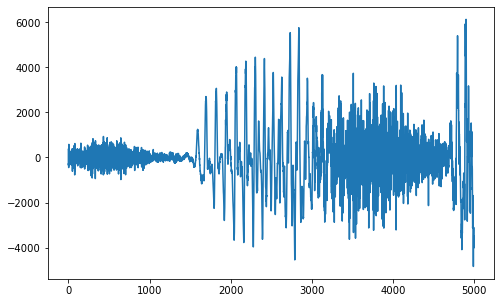

In [49]:
# show the signal from 15000 to 2000(all signal is 41984) of amplitude
t = [i for i in range(5000)]
y = samples[15000:20000]
fig, ax = plt.subplots(1, figsize=(8, 5))
ax.plot(t, y)
plt.show()

/opt/homebrew/Caskroom/miniforge/base/envs/tf25/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  return f(*args, **kwargs)


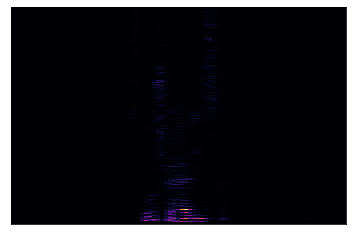

In [51]:
# make a Fourie spectrograme in signal duration
import librosa
# Load the audio file
samples, sample_rate = librosa.load(train_file0, sr=None)
sgram = librosa.stft(samples)
librosa.display.specshow(sgram)

In [53]:
sgram.shape

(1025, 83)

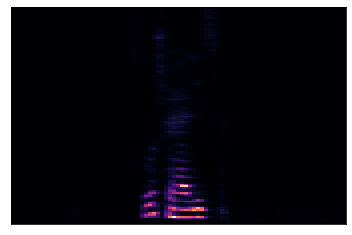

In [63]:
# use the mel-scale instead of raw frequency
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
librosa.display.specshow(mel_scale_sgram)

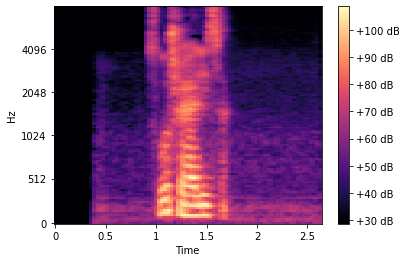

In [64]:
# use the decibel scale to get the final Mel Spectrogram
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

In [65]:
#Spectrogram is a 2D numpy array
# sgram.shape has beine (1025, 83)
print(type(mel_sgram), mel_sgram.shape)
# <class 'numpy.ndarray'> (128, 83)

<class 'numpy.ndarray'> (128, 83)


MFCC is of type <class 'numpy.ndarray'> with shape (20, 83)


/var/folders/_q/03tkk3nx5xq63qd_bldrts5h0000gn/T/ipykernel_4351/3931094380.py:9: FutureWarning: Pass y=[0.         0.         0.         ... 0.00183105 0.00186157 0.00167847] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(samples, sr=sample_rate)
/opt/homebrew/Caskroom/miniforge/base/envs/tf25/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tf25/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:254: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


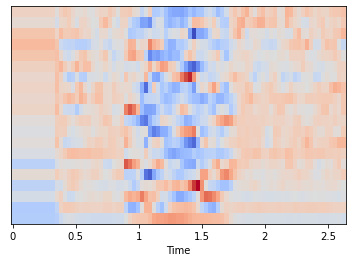

In [67]:
# try mfcc and downgrade number of hiperparametres

import sklearn
import librosa
import librosa.display

# Load the audio file
samples, sample_rate = librosa.load(train_file0, sr=None)
mfcc = librosa.feature.mfcc(samples, sr=sample_rate)

# Center MFCC coefficient dimensions to the mean and unit variance
mfcc = sklearn.preprocessing.scale(mfcc, axis=1)
librosa.display.specshow(mfcc, sr=sample_rate, x_axis='time')

print (f'MFCC is of type {type(mfcc)} with shape {mfcc.shape}')
# MFCC is of type with shape (20, 83)
# sgram.shape has beine (1025, 83)
# mel_sgram has beine (128, 83)


MFCC is of type <class 'numpy.ndarray'> with shape (20, 169)


/var/folders/_q/03tkk3nx5xq63qd_bldrts5h0000gn/T/ipykernel_4351/784352252.py:9: FutureWarning: Pass y=[0.         0.         0.         ... 0.00067139 0.0007019  0.00076294] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(samples, sr=sample_rate)
/opt/homebrew/Caskroom/miniforge/base/envs/tf25/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tf25/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:254: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


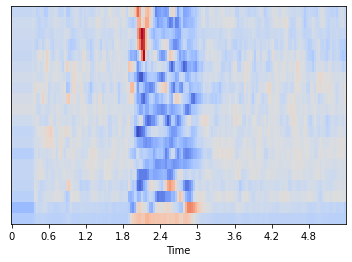

In [68]:
# try mfcc and downgrade number of hiperparametres

import sklearn
import librosa
import librosa.display

# Load the audio file
samples, sample_rate = librosa.load(train_file1, sr=None)
mfcc = librosa.feature.mfcc(samples, sr=sample_rate)

# Center MFCC coefficient dimensions to the mean and unit variance
mfcc = sklearn.preprocessing.scale(mfcc, axis=1)
librosa.display.specshow(mfcc, sr=sample_rate, x_axis='time')

print (f'MFCC is of type {type(mfcc)} with shape {mfcc.shape}')
# MFCC is of type with shape (20, 83)
# sgram.shape has beine (1025, 83)
# mel_sgram has beine (128, 83)


In [16]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# for multiplying loads
# from https://stackoverflow.com/questions/49197801/loading-multiple-audio-files-with-python-librosa-issue

# pathAudio = "~/Project Data/Practice/Train Music/"
# files = librosa.util.find_files(pathAudio, ext=['ogg']) 
# files = np.asarray(files)
# for y in files: 
#     data = librosa.load(y, sr = 16000,mono = True)   
#     data = data[0]     
#     librosa.display.waveplot(data)





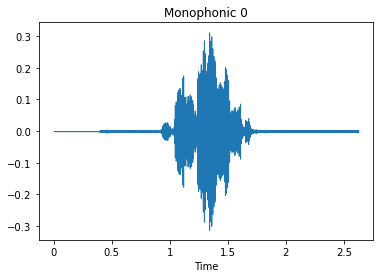

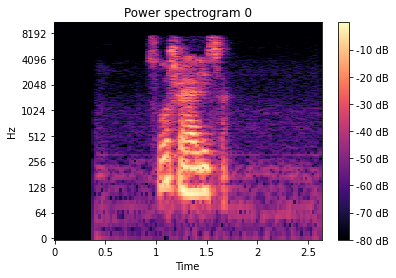

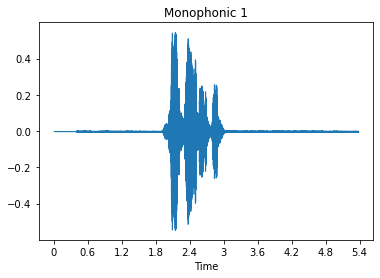

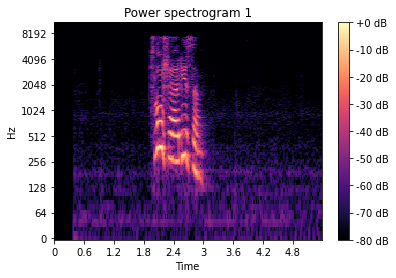

In [35]:
import librosa.display
for fi, file in enumerate([train_file0, train_file1]):
    y, sr = librosa.load(file)
    fig, ax = plt.subplots(nrows=1, sharex=True, sharey=True)
    librosa.display.waveshow(y, sr=sr, ax=ax)
    ax.set(title=f'Monophonic {fi}')
    ax.label_outer()
    plt.show()
    S = np.abs(librosa.stft(y))
    fig, ax = plt.subplots()
    img = librosa.display.specshow(librosa.amplitude_to_db(S,ref=np.max),
                                   y_axis='log', x_axis='time', ax=ax)
    ax.set_title(f'Power spectrogram {fi}')
    fig.colorbar(img, ax=ax, format="%+2.0f dB")
    plt.show()

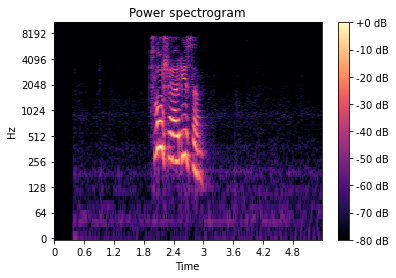

In [14]:
S = np.abs(librosa.stft(y))
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")
plt.show()

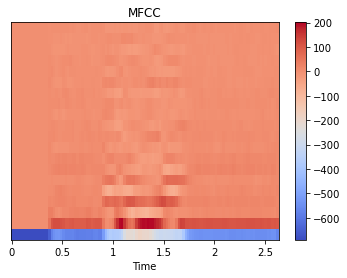

In [24]:
mfccs = librosa.feature.mfcc(y=y, sr=sr)

fig, ax = plt.subplots()
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='MFCC')
plt.show()